In [53]:
import pandas as pd


In [56]:
import matplotlib.pyplot as plt

In [61]:
import seaborn as sns

In [11]:
cd 

C:\Users\Naman Gupta


In [261]:
data = pd.read_csv("Documents/Cancer_Dataset.csv")

In [262]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [263]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Mean for Insulin is very high comapred to 50th percentile, many outliers on the higher side

In [264]:
df =data.copy()

In [265]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Cancer_Markers', 'Age', 'Outcome'],
      dtype='object')

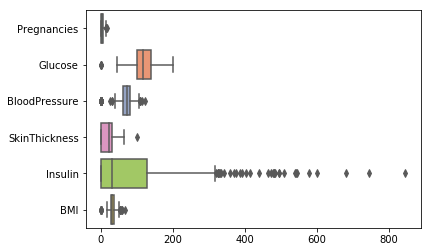

In [266]:
sns.boxplot( data = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']],orient ='h',palette = 'Set2')

In [267]:
len(data[data.Age==0])

0

# Glucose

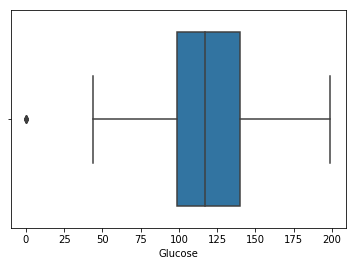

In [268]:
sns.boxplot(data.Glucose)

There are not many outliers for Glucose, so we can use Mean

In [269]:
mean = data.Glucose.mean()*len(data.Glucose)/(len(data.Glucose)-len(data[data.Glucose == 0]))
for row, k in df.iterrows():
    if(k.Glucose == 0): 
        df.at[row,'Glucose'] = int(mean)

# Blood Pressure

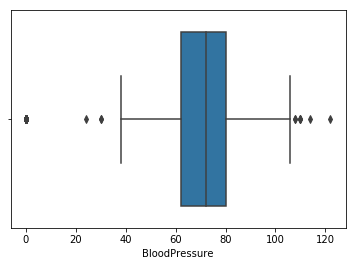

In [270]:
sns.boxplot(data.BloodPressure)

There are not many outliers for BP, so we can use Mean

In [271]:
len(data[data.BloodPressure == 0])

35

In [272]:
mean = data.BloodPressure.mean()*len(data.BloodPressure)/(len(data.BloodPressure)-len(data[data.BloodPressure == 0]))
for row, k in df.iterrows():
    if(k.BloodPressure == 0): 
        df.at[row,'BloodPressure'] = int(mean)

# Skin Thickness

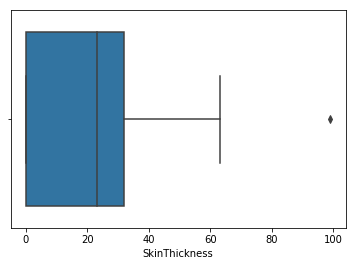

In [273]:
sns.boxplot(data.SkinThickness)

In [274]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data.SkinThickness))
threshold = 2
print(np.where(z > 2))

(array([ 57,  86, 120, 211, 445, 579], dtype=int64),)


In [275]:
len(data[data.SkinThickness == 0])

227

Total number or rows in orignal data is 768, and out of that 227 are empty !!! That means that we need to recalcylate the mean by removing the rows with zero value for Skin Thickness

In [276]:
mean = data.SkinThickness.mean()*len(data.SkinThickness)/(len(data.SkinThickness)-len(data[data.SkinThickness == 0]))
for row, k in df.iterrows():
    if(k.SkinThickness == 0): 
        df.at[row,'SkinThickness'] = int(mean)

# Insulin

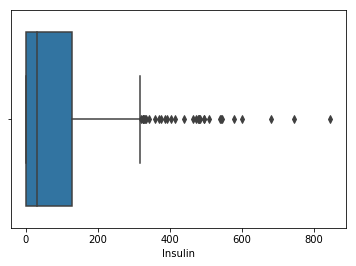

In [277]:
sns.boxplot(data.Insulin)

There are many outliers for Insulin, so we cannot use Mean. We will either use Mode or 75th percentile

In [278]:
len(data[data.Insulin == 0])

374

Total number or rows in orignal data is 768, and out of that 374 are empty !!! That means that we need to recalcylate the mean by removing the rows with zero value for Insulin

# Removing Outliers using Z-Score for Insulin

 Z-score tells how many standard deviations away a given observation is from the mean. For example, a Z score of 2.5 means that the data point is 2.5 standard deviation far from the mean. And since it is far from the center, it's flagged as an outlier/anomaly.

In [279]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data.Insulin))

Looking the code and the output above, it is difficult to say which data point is an outlier. Let’s try and define a threshold to identify an outlier.

In [280]:
threshold = 3
print(np.where(z > 3))

(array([  8,  13, 111, 153, 186, 220, 228, 247, 286, 370, 409, 415, 486,
       584, 645, 655, 695, 753], dtype=int64),)


In [281]:
data.iloc[8]

Pregnancies         2.000
Glucose           197.000
BloodPressure      70.000
SkinThickness      45.000
Insulin           543.000
BMI                30.500
Cancer_Markers      0.158
Age                53.000
Outcome             1.000
Name: 8, dtype: float64

In [282]:
mean = data.Insulin.mean()*len(data.Insulin)/(len(data.Insulin)-len(data[data.Insulin == 0]))
for row, k in df.iterrows():
    if(k.Insulin == 0): 
        df.at[row,'Insulin'] = int(mean)

In [283]:
df.Insulin.describe()

count    768.00000
mean     155.28125
std       85.02155
min       14.00000
25%      121.50000
50%      155.00000
75%      155.00000
max      846.00000
Name: Insulin, dtype: float64

In [284]:
np.where(z > 3)

(array([  8,  13, 111, 153, 186, 220, 228, 247, 286, 370, 409, 415, 486,
        584, 645, 655, 695, 753], dtype=int64),)

# BMI

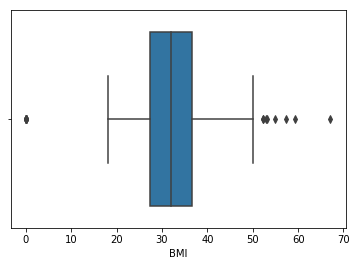

In [287]:
sns.boxplot(data.BMI)

# Outliers for BMI

In [288]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data.BMI))
threshold = 3
print(np.where(z > 3))

(array([  9,  49,  60,  81, 145, 177, 371, 426, 445, 494, 522, 673, 684, 706], dtype=int64),)


In [289]:
mean = data.BMI.mean()*len(data.BMI)/(len(data.BMI)-len(data[data.BMI == 0]))
for row, k in df.iterrows():
    if(k.BMI == 0): 
        df.at[row,'BMI'] = int(mean)

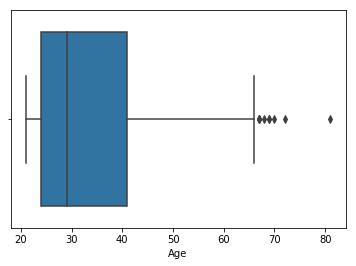

In [290]:
sns.boxplot(data.Age)

# Cancer Markers

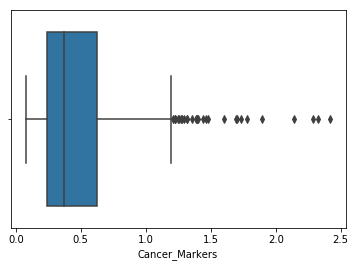

In [291]:
sns.boxplot(data.Cancer_Markers)

In [292]:
len(data[data.Cancer_Markers==0])

0

In [293]:
df_o = df.drop(df.index[[ 8,  13, 111, 153, 186, 220, 228, 247, 286, 370, 409, 415, 486,
        584, 645, 655, 695, 753,9,  49,  60,  81, 145, 177, 371, 426, 445, 494, 522, 673, 684, 706,57,  86, 120, 211, 445, 579]])

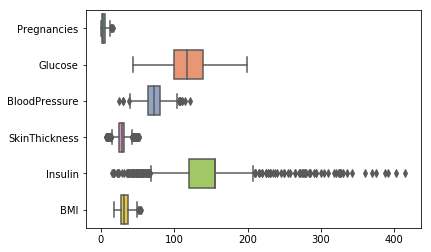

In [294]:
sns.boxplot( data = df_o[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']],orient ='h',palette = 'Set2')

# Pair Plot and Scatter Plot

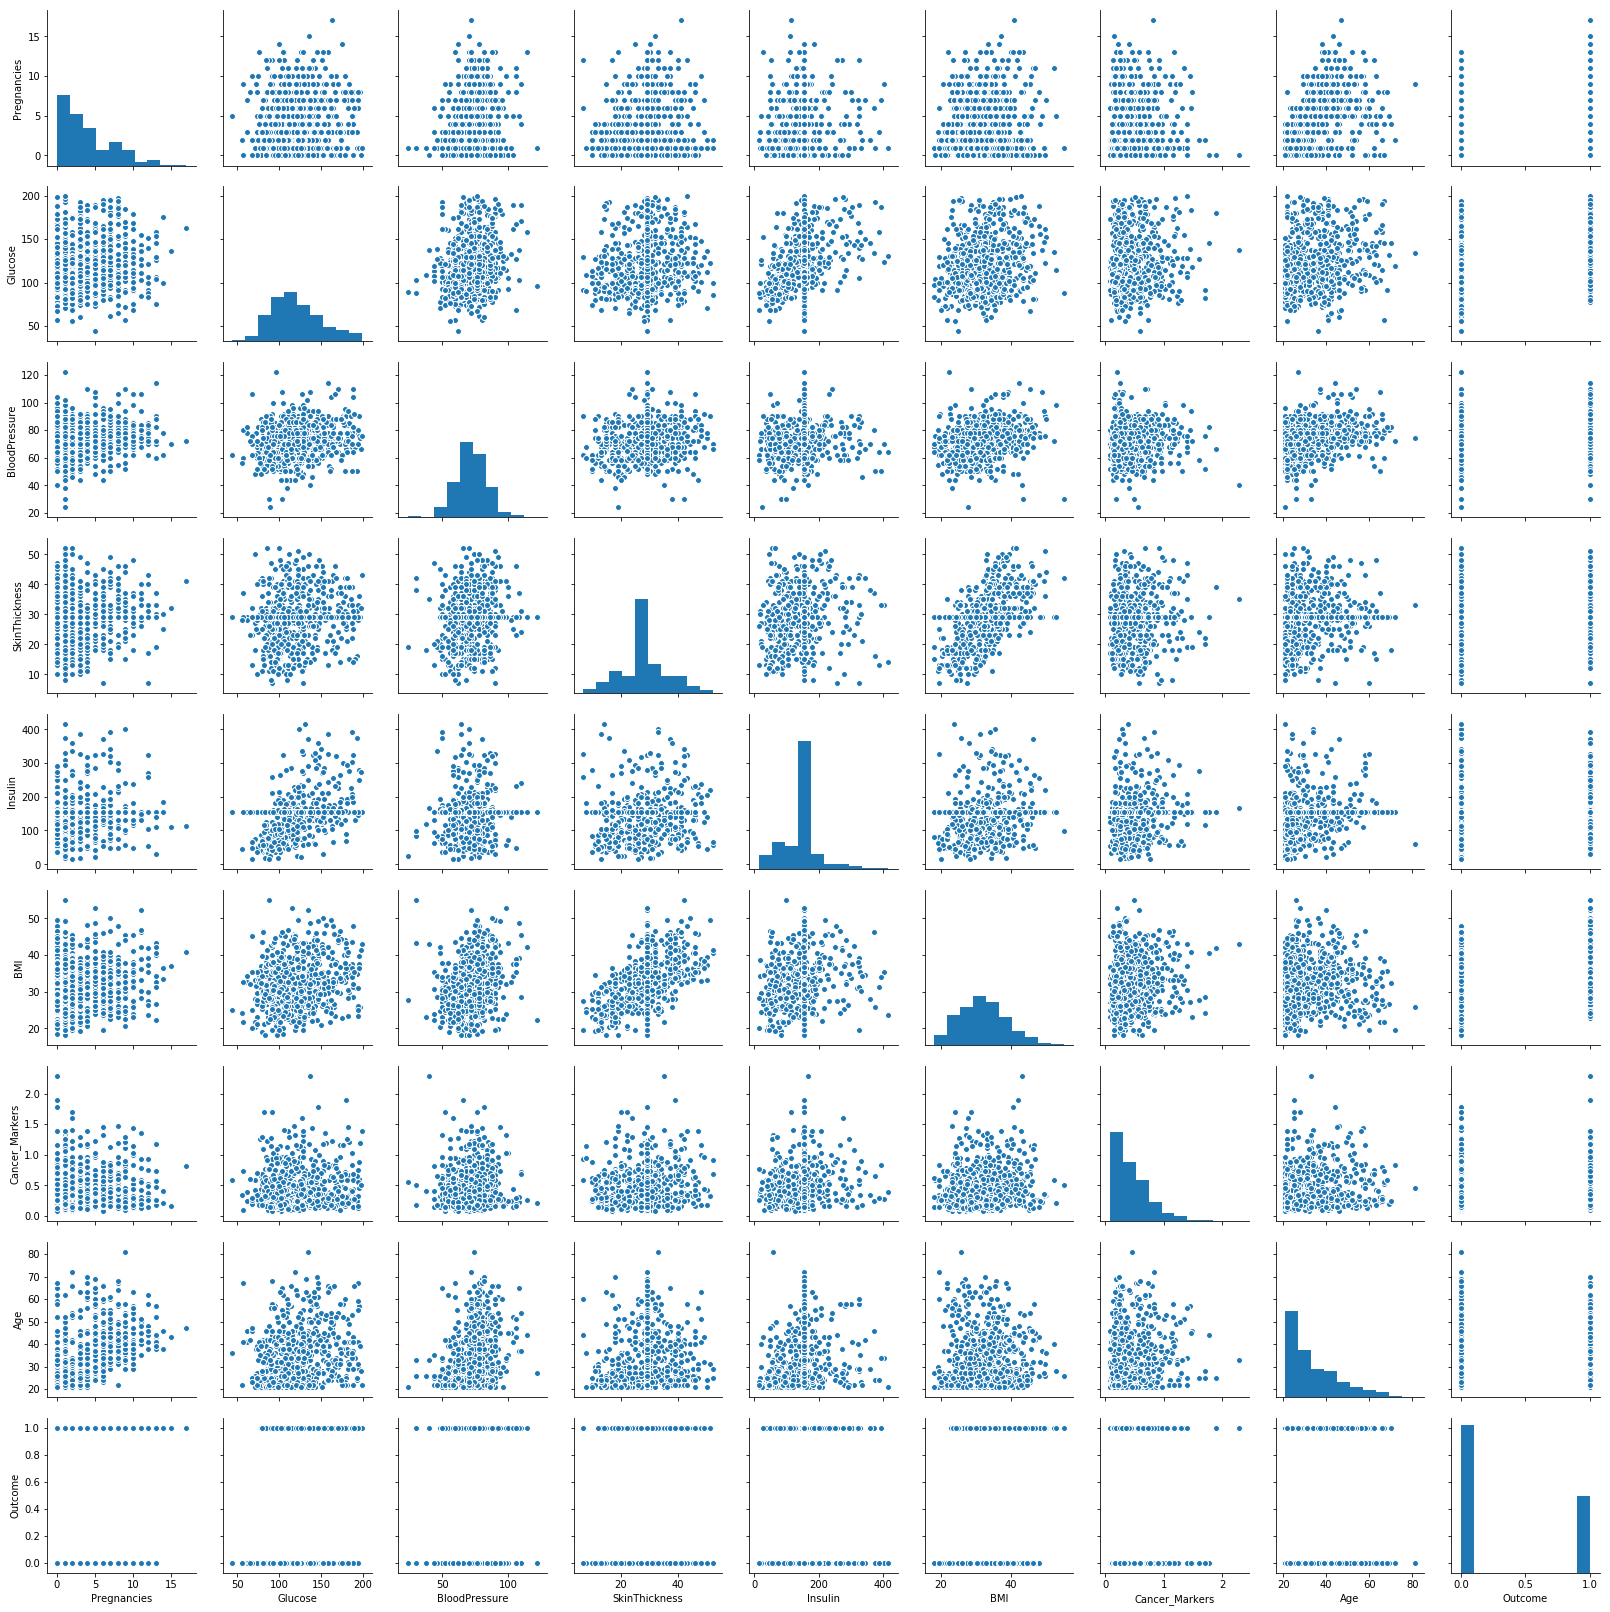

In [297]:
# pairplot with hue sex
sns.pairplot(df_o)
# to show
plt.show()

# HeatMap

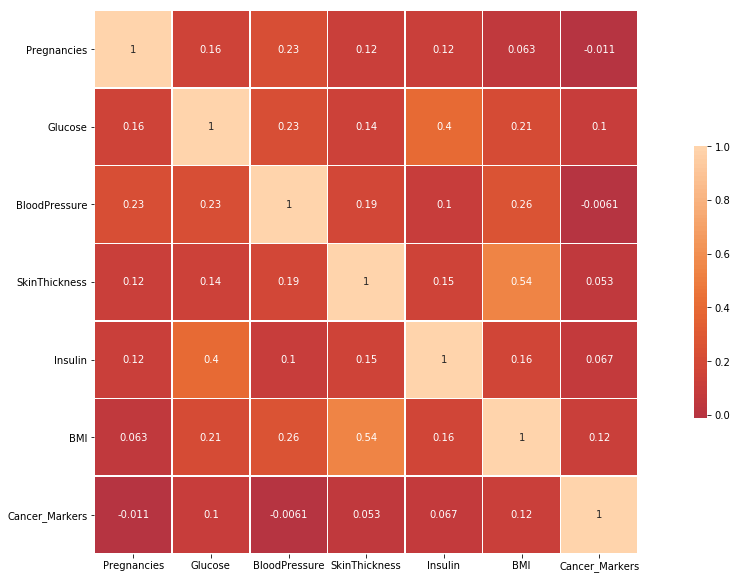

In [303]:
f, ax = plt.subplots(figsize=(20, 10))
# cmap = sns.diverging_palette(20, 200, as_cmap=True)
sns.heatmap(df_o[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI','Cancer_Markers']].corr(), annot=True, center=-1,
square=True, linewidths=.5, cbar_kws={"shrink": .5})

Removing Skin Thickness as it is very correlated to BMI. Similarly Insulin and Glucose are also related

# Scaling Data

In [251]:
from sklearn.preprocessing import MinMaxScaler

In [252]:
min_max_scaler = MinMaxScaler()

In [253]:
df_o.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Cancer_Markers', 'Age', 'Outcome'],
      dtype='object')

In [255]:
df_o[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Cancer_Markers', 'Age']] = min_max_scaler.fit_transform(df_o[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Cancer_Markers', 'Age']])

In [257]:
df_o.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
0,0.352941,0.670968,0.489796,0.622222,0.3500,0.418478,0.248416,0.483333,1
1,0.058824,0.264516,0.428571,0.488889,0.3500,0.228261,0.123529,0.166667,0
2,0.470588,0.896774,0.408163,0.488889,0.3500,0.138587,0.268778,0.183333,1
3,0.058824,0.290323,0.428571,0.355556,0.1975,0.269022,0.040271,0.000000,0
4,0.000000,0.600000,0.163265,0.622222,0.3825,0.676630,1.000000,0.200000,1


# KNN

In [298]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [304]:
X = df_o[['Pregnancies', 'Glucose', 'BloodPressure', 
       'BMI', 'Cancer_Markers', 'Age']]
y =df_o[['Outcome']]
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=42)

In [305]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print(knn.predict(X_test))

[1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0
 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1
 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0]


C:\Anaconda31\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


C:\Anaconda31\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


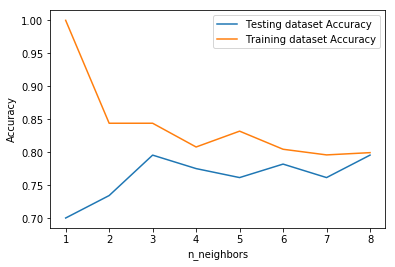

In [306]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute traning and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

# Best value of k is coming out to be 3

# Confusion Matrix 

In [308]:
from sklearn.metrics import confusion_matrix

In [309]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print(knn.predict(X_test))

[0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0
 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1
 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0]


C:\Anaconda31\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [310]:

confusion_matrix(y_test, knn.predict(X_test))

array([[86, 11],
       [19, 31]], dtype=int64)

True Negative = 86
True Positive = 31
False Negative = 19
False Positive = 11

In [311]:
from sklearn.metrics import f1_score

In [312]:
f1_score(y_test, knn.predict(X_test), average='macro')

0.76269909599655616